In [63]:
!pip install tweepy

In [64]:
!pip install protobuf==3.20.1

In [65]:
!pip install zeugma

In [66]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\tjame\anaconda3\lib\site-packages (4.2.0)


In [67]:
!python -m pip install gensim==4.2.0

In [68]:
!pip install pyLDAvis

In [69]:
!pip install glove_py

  Using cached glove_py-0.2.3.tar.gz (19 kB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\tjame\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\tjame\\AppData\\Local\\Temp\\pip-install-25lwlmm3\\glove-py\\setup.py'"'"'; __file__='"'"'C:\\Users\\tjame\\AppData\\Local\\Temp\\pip-install-25lwlmm3\\glove-py\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\tjame\AppData\Local\Temp\pip-pip-egg-info-w5glzt8t'
         cwd: C:\Users\tjame\AppData\Local\Temp\pip-install-25lwlmm3\glove-py\
    Complete output (10 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\tjame\AppData\Local\Temp\pip-install-25lwlmm3\glove-py\setup.py", line 157, in <module>
        long_description = fh.read()
      File "C:\Users\tjame\anaconda3\lib\encodings\cp1252.py", line 23,

In [70]:
!python -m pip install seaborn

In [71]:
!python -m pip install wordcloud

In [72]:
! pip install textblob

# Importing Libraries

In [73]:
import gensim
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import pickle
import re
import pandas as pd
from tqdm.notebook import tqdm
from gensim.models.word2vec import Word2Vec
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.test.utils import datapath
import pandas as pd
import tweepy as tw
import os
from tweepy import OAuthHandler
from textblob import TextBlob
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from collections import Counter, defaultdict
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from sklearn import decomposition
#import zeugma
#from zeugma.embeddings import EmbeddingTransformer
from gensim.utils import simple_preprocess
#from gensim.sklearn_api import W2VTransformer
import sklearn 
from sklearn.base import BaseEstimator, TransformerMixin
import pyLDAvis.sklearn
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

In [74]:
RANDOM_SEED = 655

# Uploading Celtics text data previously extracted from Twitter

In [75]:
tweets_df_Celtics = pd.read_csv('tweets_df_Celtics.csv')
tweets_df_Celtics.head()

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,0,The Celtics Files,"Boston, MA",Opening the files on all things Celtics 🍀,False,2022-10-11 15:06:01+00:00,"Think of it like this. After the weekend, ther...",['Celtics'],Twitter for iPhone
1,1,Maillot de Foot Pas Cher,COMMANDER➩,Prix: 15€\n✈📦 Expedition : Express 8/10 jours,False,2022-10-11 15:05:56+00:00,⚽|Nouveau #Celtics Vert 2022 Jayson Tatum 0⃣\n...,"['Celtics', 'playoffnba']",TweetDeck
2,2,Boston Celtics Fans,NaN,Boston Celtics Fan Page. NOT linked to Officia...,False,2022-10-11 14:55:04+00:00,Jayson Tatum surprises fans on stage at Jack H...,"['Boston', 'TeamCeltics', 'Celtics', 'CelticsT...",SocialBee.io v2
3,3,The Celtics Files,"Boston, MA",Opening the files on all things Celtics 🍀,False,2022-10-11 14:54:43+00:00,Grant Williams took an enormous leap last year...,NaN,Twitter for iPhone
4,4,Boston Celtics Fans,NaN,Boston Celtics Fan Page. NOT linked to Officia...,False,2022-10-11 14:51:01+00:00,Celtics sign A.J. Reeves to Exhibit 10 contrac...,"['Boston', 'TeamCeltics', 'Celtics', 'CelticsT...",SocialBee.io v2


In [76]:
Celtics_tweet_texts = tweets_df_Celtics['text']
Celtics_text_sources = tweets_df_Celtics['source']
d = {'Celtics_Tweet_Text':Celtics_tweet_texts, 'Celtics_Text_Source':Celtics_text_sources}
Celtics_tweet_df = pd.DataFrame(data=d)
Celtics_tweet_df.head()

,Celtics_Tweet_Text,Celtics_Text_Source
0,"Think of it like this. After the weekend, ther...",Twitter for iPhone
1,⚽|Nouveau #Celtics Vert 2022 Jayson Tatum 0⃣\n...,TweetDeck
2,Jayson Tatum surprises fans on stage at Jack H...,SocialBee.io v2
3,Grant Williams took an enormous leap last year...,Twitter for iPhone
4,Celtics sign A.J. Reeves to Exhibit 10 contrac...,SocialBee.io v2


# Cleaning the data

In [77]:
Celtics_tweet_df['Celtics_Tweet_Text'] = Celtics_tweet_df['Celtics_Tweet_Text'].apply(lambda x: x.lower())

In [78]:
Celtics_tweet_df['Celtics_Tweet_Text'] = Celtics_tweet_df['Celtics_Tweet_Text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
Celtics_tweet_df['Celtics_Tweet_Text'] = Celtics_tweet_df['Celtics_Tweet_Text'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x).split()))

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-78-65a62533cc6c>:2: DeprecationWarning: invalid escape sequence \w
  Celtics_tweet_df['Celtics_Tweet_Text'] = Celtics_tweet_df['Celtics_Tweet_Text'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x).split()))


In [79]:
Celtics_tweet_df.head()

,Celtics_Tweet_Text,Celtics_Text_Source
0,think of it like this after the weekend there ...,Twitter for iPhone
1,nouveau celtics vert 2022 jayson tatum 0 au pr...,TweetDeck
2,jayson tatum surprises fans on stage at jack h...,SocialBee.io v2
3,grant williams took an enormous leap last year...,Twitter for iPhone
4,celtics sign a j reeves to exhibit 10 contract...,SocialBee.io v2


# Utilizing NLP's word_tokenize to split the Celtics' list of tweets into words using a tqdm to speed up the process

In [80]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjame\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
nltk_tokenized_Celtics_tweet_texts = []

for Celtics_tweet_text in tqdm(Celtics_tweet_texts):
    nltk_tokenized_Celtics_tweet_texts.append(word_tokenize(Celtics_tweet_text))

  0%|          | 0/6045 [00:00<?, ?it/s]

# Comparing the NLTK tokenization to a regular-expression based extraction

In [82]:
re_tokenized_Celtics_tweet_texts = []

for Celtics_tweet_text in tqdm(Celtics_tweet_texts):
    word_splitter = re.findall(r"\w+",Celtics_tweet_text)
    re_tokenized_Celtics_tweet_texts.append(word_splitter)

  0%|          | 0/6045 [00:00<?, ?it/s]

# Count how many unique tokens were found from the NLTK and RegEx methods

In [83]:
nltk_word_counts = Counter()
re_word_counts = Counter()

for Celtics_tweet_text in nltk_tokenized_Celtics_tweet_texts:
    for wor in Celtics_tweet_text:
        nltk_word_counts[wor]+=1
for b in re_tokenized_Celtics_tweet_texts:
    for w in b:
        re_word_counts[w]+=1

In [84]:
len(nltk_word_counts), len(re_word_counts)

(9411, 8696)

# Identify the 20 most common words that were missed through the imprecision of RegEx matching

In [85]:
unique_word_counts = nltk_word_counts.copy()
for x in nltk_word_counts:
    if re_word_counts[x] != 0:
        del unique_word_counts[x]

In [86]:
unique_word_counts1 = Counter(unique_word_counts).most_common(20)
unique_word_counts1

[('#', 27665),
 (':', 7170),
 (',', 2270),
 ('.', 1952),
 ('@', 1622),
 ('’', 1184),
 ('!', 1170),
 ("'s", 714),
 ('?', 546),
 ("'", 522),
 (';', 414),
 (')', 398),
 ('-', 386),
 ('(', 362),
 ('&', 302),
 ('...', 296),
 ('“', 218),
 ('”', 196),
 ('|', 180),
 ("''", 172)]

In [87]:
len(unique_word_counts)

2847

# We are mostly missing only punctuations and abbreviations.  This is efficient for better text analyses.  The NLTK method will be selected for this project as the better quality analysis.

In [88]:
all_tokenized_Celtics_tweet_texts = nltk_tokenized_Celtics_tweet_texts
word_counts = nltk_word_counts

In [89]:
len(word_counts)

9411

# Record all lower-case word counts and print the number of unique words.  How many upper-case words did we learn?

In [90]:
lowercase_word_counts = {k.lower(): v for k, v in word_counts.items()}

In [91]:
len(word_counts), len(lowercase_word_counts)

(9411, 8140)

In [92]:
word_case_difference = abs((len(word_counts))-(len(lowercase_word_counts)))
word_case_difference

1271

# Train a Word2Vec Model on the Golden State Warriors tokenized twitter data

In [93]:
quick_model = Word2Vec(sentences=all_tokenized_Celtics_tweet_texts, vector_size=50, window=2, min_count=100, workers=4, seed=RANDOM_SEED)

In [94]:
quick_word_vectors = quick_model.wv

In [95]:
quick_word_vectors.similar_by_word("Celtics")[:10]

[('CelticsTalk', 0.7690304517745972),
 ('Boston', 0.7666351795196533),
 ('TeamCeltics', 0.7601711750030518),
 ('Rumors', 0.7478963732719421),
 ('2022-23', 0.7311322093009949),
 ('10', 0.7096484899520874),
 ('GreenRunsDeep', 0.7085715532302856),
 ('CelticsNation', 0.6916176080703735),
 ('BostonCeltics', 0.6882823705673218),
 ('?', 0.6224955916404724)]

In [96]:
quick_word_vectors.similar_by_word("TeamCeltics")[:10]

[('CelticsNation', 0.8233211636543274),
 ('CelticsTalk', 0.7912587523460388),
 ('BostonCeltics', 0.7720702290534973),
 ('Celtics', 0.7601711750030518),
 ('GreenRunsDeep', 0.7580694556236267),
 ('Rumors', 0.7090717554092407),
 ('Boston', 0.6984567046165466),
 ('2022-23', 0.6528031826019287),
 (':', 0.616955041885376),
 ('https', 0.5922279357910156)]

In [97]:
quick_word_vectors.similar_by_word("CelticsNation")[:10]

[('GreenRunsDeep', 0.9080110788345337),
 ('BostonCeltics', 0.8590328097343445),
 ('TeamCeltics', 0.8233211636543274),
 ('CelticsTalk', 0.8141157627105713),
 ('Rumors', 0.7620927095413208),
 ('2022-23', 0.7378100156784058),
 ('Celtics', 0.6916176676750183),
 (':', 0.67387455701828),
 ('https', 0.6720997095108032),
 ('Boston', 0.6548848152160645)]

In [98]:
quick_word_vectors.similar_by_word("BostonCeltics")[:10]

[('GreenRunsDeep', 0.8772203922271729),
 ('CelticsNation', 0.8590328693389893),
 ('https', 0.8320164084434509),
 ('CelticsTalk', 0.8280858993530273),
 ('EasternConference', 0.8230825066566467),
 (':', 0.7874123454093933),
 ('AtlanticDivision', 0.7838098406791687),
 ('TeamCeltics', 0.7720702290534973),
 ('BlakeGriffin', 0.7605097889900208),
 ('#', 0.7422264814376831)]

# Using Bag-of-Words to transform the list of strings from the Twitter tweets into a numeric document-term matrix

In [99]:
Celtics_Tweet_Text = Celtics_tweet_df['Celtics_Tweet_Text']
tf_vectorizer = CountVectorizer(stop_words = 'english')
tf_documents = tf_vectorizer.fit_transform(Celtics_Tweet_Text)

print("doc-term matrix shape:", tf_documents.shape)
print("doc-term matrix initial row (first document vector):\n",
tf_documents[0:1])

doc-term matrix shape: (6045, 4973)
doc-term matrix initial row (first document vector):
   (0, 4482)	1
  (0, 2729)	1
  (0, 4834)	1
  (0, 1356)	1
  (0, 954)	1
  (0, 3817)	1
  (0, 3767)	1


# Accessing Corpus Term Information

In [100]:
tf_feature_names = tf_vectorizer.get_feature_names()
vocab = tf_vectorizer.vocabulary_

print("Number of unique terms in vocabulary:", len(tf_feature_names))
print("And here are the terms:\n")
for i in range(0, len(tf_feature_names)):
    print(tf_feature_names[i])
    
## Which column corresponds to a given term?
print("The term frequency of \'JaysonTatum' can be found in column", vocab["JaysonTatum"])
print("The term frequency of \'JaylenBrown' can be found in column", vocab["JaylenBrown"])
print("The term frequency of \'CelticsTalk' can be found in column", vocab["CelticsTalk"])
print("The term frequency of \'GreenRunsDeep' can be found in column", vocab["GreenRunsDeep"])
print("The term frequency of \'BostonCeltics' can be found in column", vocab["BostonCeltics"])
print("The term frequency of \'CelticsNation' can be found in column", vocab["CelticsNation"])

Number of unique terms in vocabulary: 4973
And here are the terms:

00
01
03
04
05
07
08
09
0m
10
100
102
103
104
105
1050
107
10p
10pts
10reb
10th
10x
11
110
112
113
114
119
12
122
12451
12452
125
1287
12mm
12pm
12pts
13
130
131
134
13m
13p
13pts
14
145
146
14pts
14th
15
16
17
17pts
18
187
188
18points
18pts
18th
19
1946
1965
1969
1971
198
1980
1986
1987
1988
1992
1996
1997
1998
19pts
1a
1b
1blk
1q
1st
1t2
1v1
20
2000
2002
2008
2009
2010
2012
2014
2015
2016
2017
2018
2019
2020
2021
202122season
2022
20222023nbaseason
2023
204
205
21
22
227
229
22pts
23
23pts
24
240lbs
24autogroup
25
26
262
26th
27
29
2a
2k
2k20
2k22
2k23
2kcommunity
2ksports
2nd
2r
2stl
2t3
2tl
30
300
30pm
31
32
322
326
33
34
340
34pts
35
350
36
360
36ers
37
375
37937
38
39
3a
3ast
3fg
3p
3pt
3pts
3r
3rd
3reb
3s
3stl
3u
40
401
41
43
44
45
45ing
45pm
46
47
48
481
49ers
4pm
4q
4reb
4t2
4th
4x
50
500leo
50m
51
514
52
53
54
55
56
563
57
58
59
59fifty
5ast
5pm
5th
5x
600
61
616
62
63
638
650
66
69
6ast
6p
6pm
6reb
6th
6x
7

KeyError: 'JaysonTatum'

# Transforming the list of Boston Celtics Twitter tweets into a numeric document-term matrix using tf.idf weights

In [101]:
tfidf_vectorizer = TfidfVectorizer(max_features = 1000,
                                  lowercase=False, #keep Capitalization
                                  ngram_range=(1,2), #include 2-word phrases
                                  min_df=10,  #absolute count of doc
                                  max_df=0.95, # percent number of docs
                                  stop_words='english') #default English stopwords

tfidf_documents = tfidf_vectorizer.fit_transform(Celtics_Tweet_Text)
tfidf_documents

<6045x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 78949 stored elements in Compressed Sparse Row format>

# Latent Semantic Indexing (LSI): A Semantic Analysis used to index the processed text data and observe an estimate of any existing potential latent semantic structure in the data that is partially obscured by the randomness of word choice with respect to retrieval.

In [102]:
from sklearn.metrics.pairwise import cosine_similarity
Celtics_Text_Source = Celtics_tweet_df['Celtics_Text_Source']
def answer_semantic_similarity_a():
    Celtics_Tweet_Text = Celtics_tweet_df['Celtics_Tweet_Text']
    tfidf_vectorizer = TfidfVectorizer(ngram_range = (1,1),
                                       min_df = 2,
                                       max_df = 0.95,
                                       max_features = 10000,
                                       stop_words = 'english')
    #xcord = Celtics_tweet_df.vectorize(Celtics_tweet_df.Celtics_Tweet_Text)
    #ycord = Celtics_tweet_df.vectorize(Celtics_tweet_df.Celtics_Text_Source)
    tfidf_documents = tfidf_vectorizer.fit_transform(Celtics_Tweet_Text)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    n_topics = 200
    lsi = TruncatedSVD(n_components=n_topics, random_state=0)
    
    #This is the matrix U_k: num_term_features x num_topics
    reduced_term_matrix1 = lsi.fit_transform(np.transpose(tfidf_documents))
    
    #This is the matrix V_k^T num_topics x num_documents
    reduced_document_matrix1 = lsi.components_
    
    #These are the values along the diagonal of matrix \Sigma
    singular_values1 = lsi.singular_values_
    
    
    
    q = tfidf_vectorizer.transform(['Celtics_Tweet_Text'])
    
    d = tfidf_vectorizer.transform(['Celtics_Text_Source'])
    
    q_k = np.multiply(lsi.singular_values_ ** -1, q @ reduced_term_matrix1)
    
    d_k = np.multiply(lsi.singular_values_ ** -1, d @ reduced_term_matrix1)
    
    similarity_original = float(cosine_similarity(q, d))
    similarity_lsi = float(cosine_similarity(q_k, d_k))
    
    result = (similarity_original, similarity_lsi)

    return result
answer_semantic_similarity_a()

(0.0, 0.0)

# LSI performs truncated SVD on the tf.idf.  The transpose of the document-term matrix is acquired to give TruncatedSVD the term-document matrix as input

In [103]:
n_topics = 200
lsi = TruncatedSVD(n_components=n_topics, random_state=0)

#Create a matrix containing num_term_features x num_topics
reduced_term_matrix = lsi.fit_transform(np.transpose(tfidf_documents))

#Create a matrix containing num_topics x num_documents
reduced_document_matrix = lsi.components_

#the values along the diagonal of matrix Sigma
singular_values = lsi.singular_values_

print("length of documents_train:", len(Celtics_Tweet_Text))
print("Shape of tfidf_documents:", tfidf_documents.shape)
print("Shape of reduced_term_matrix:", reduced_term_matrix.shape)
print("Shape of reduced_document_matrix:", reduced_document_matrix.shape)
print("Shape of lsi components_:", lsi.components_.shape)
print("Shape of lsi singular_values_:", lsi.singular_values_.shape)

length of documents_train: 6045
Shape of tfidf_documents: (6045, 1000)
Shape of reduced_term_matrix: (1000, 200)
Shape of reduced_document_matrix: (200, 6045)
Shape of lsi components_: (200, 6045)
Shape of lsi singular_values_: (200,)


# For large collections (thousands of documents) n_topics typically 100-400

# Utilizing Cosine Similarity to determine if LSI identified any matches

In [104]:
reduced_term_matrix_shrunk = reduced_term_matrix[0:200,:]
reduced_document_matrix_shrunk = reduced_document_matrix[:,0:200]

In [105]:
similarity_lsi = cosine_similarity(reduced_term_matrix_shrunk, reduced_document_matrix_shrunk)
print("similarity score in LSI term space:", similarity_lsi)

similarity score in LSI term space: [[ 0.01850504  0.07450344  0.00806317 ...  0.05526053  0.12322497
  -0.01290955]
 [-0.01047409  0.02004073 -0.01580752 ...  0.05234549  0.13561589
   0.01711494]
 [-0.01862466 -0.08521859 -0.04980784 ...  0.01506538  0.06270297
   0.11519905]
 ...
 [ 0.12223499  0.05230136  0.07896842 ...  0.10170393 -0.06538037
  -0.05802481]
 [-0.09750693  0.11455942  0.08078631 ...  0.06012933 -0.00261425
  -0.10903817]
 [ 0.02772048 -0.0594913   0.02183655 ...  0.16112705  0.09342521
  -0.137767  ]]


# What Semantically Related Terms are being used for matching? We can find-out by calculating the term-term relationship matrix.

In [106]:
#q = tfidf_vectorizer.transform(['Celtics_Tweet_Text'])
#d = tfidf_vectorizer.transform(['Celtics_Text_Source'])
#q_k = np.multiply(lsi.singular_values_ ** -1, q @ reduced_term_matrix_shrunk)
#d_k = np.multiply(lsi.singular_values_ ** -1, d @ reduced_term_matrix_shrunk)
term_term_matrix = np.dot(reduced_term_matrix, np.transpose(reduced_term_matrix))
term_term_matrix

array([[ 1.14801640e+00,  1.01606924e+00,  5.33809628e-01, ...,
         2.51092698e-03,  1.92534405e-03, -1.60612696e-03],
       [ 1.01606924e+00,  1.03203182e+00,  5.15400700e-01, ...,
        -9.06934467e-03, -1.76356468e-02, -4.90040030e-04],
       [ 5.33809628e-01,  5.15400700e-01,  7.31342897e-01, ...,
         1.88740886e-02,  2.19262135e-02, -1.27699833e-04],
       ...,
       [ 2.51092698e-03, -9.06934467e-03,  1.88740886e-02, ...,
         1.29110814e+00, -1.11288709e-02,  4.04836165e-03],
       [ 1.92534405e-03, -1.76356468e-02,  2.19262135e-02, ...,
        -1.11288709e-02,  2.02663051e+00,  1.75634570e+00],
       [-1.60612696e-03, -4.90040030e-04, -1.27699833e-04, ...,
         4.04836165e-03,  1.75634570e+00,  1.77420311e+00]])

In [107]:
similarity_lsi.shape

(200, 200)

In [108]:
#def print_lsi_related_terms(t, top):
#    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
#    #return tfidf_feature_names
#    term_index = tfidf_vectorizer.vocabulary_[t]
#    top_related_term_indexes = term_term_matrix[term_index, :].argsort()[::-1]
#    
#    for i in range(0, top):
#        this_term = top_related_term_indexes[i]
#        print('\t{} ({:.2f})'.format(tfidf_feature_names[this_term], term_term_matrix[term_index, this_term]))
#        
#print_lsi_related_terms("BostonCeltics", 5)
#    term_index_vals = term_index.values()
#    term_index_vals1 = list(term_index_vals)
    #print("Top LSI-related terms for", t, ":")
#    top_related_term_indexes = term_term_matrix[term_index_vals1, :].argsort()[::-1]
#    for i in range(0, top):
#        this_term = top_related_term_indexes[i]
        #return this_term
#        this_term_array = np.array(this_term)
#        this_term_int = this_term_array.astype(int)

        #x = np.array(list(map(np.int_, this_term_array)))
        #return x
        #vector = np.vectorize(np.int_)
        #this_term_array = np.array(this_term)
        #this_term_vec = vector(this_term_array)
        #this_term_int = np.vectorize(int(this_term))
#        print(tfidf_feature_names[this_term_int], term_term_matrix[term_index_vals1, this_term_int])
    #return term_index_vals1 
    #return top_related_term_indexes
#print_lsi_related_terms("GoldenStateWarriors", 5)

# Latent Dirichlet Allocation can be used to specify a probability distribution over multinomials. It helps us answer the question, "What is the probability of observing a given multinomial distribution over k categories?"

In [109]:
lda = LatentDirichletAllocation(n_components = 10, random_state=0)
lda.fit(tf_documents)
topic_models= lda.components_

In [110]:
document_train = Celtics_tweet_df['Celtics_Tweet_Text']

# Figure 7

In [111]:
num_top_words = 8
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        term_list = [feature_names[i] 
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        print("topic %d:" % (topic_idx), term_list)
                     
display_topics(lda, tf_feature_names, num_top_words)

topic 0: ['celtics', 'smart', 'marcus', 'boston', 'udoka', 'imeudoka', 'bostonceltics', 'ime']
topic 1: ['celtics', 'nba', 'game', 'season', 'bostonceltics', 'basketball', 'massachusetts', 'nbaeasternconferenceatlanticdivision']
topic 2: ['celtics', 'bostonceltics', 'celticsnation', 'celticstalk', 'hornets', 'boston', 'greenrunsdeep', 'preseason']
topic 3: ['celtics', 'boston', 'celticstalk', 'brown', 'jaylen', 'bostonceltics', 'tatum', 'teamceltics']
topic 4: ['celtics', 'nba', 'boston', 'griffin', 'bostonceltics', 'celticstalk', 'blake', 'teamceltics']
topic 5: ['celtics', 'bostonceltics', 'boston', '10', 'celticsnation', 'greenrunsdeep', '22', 'year']
topic 6: ['celtics', 'boston', 'celticstalk', 'teamceltics', 'bostonceltics', 'griffin', 'blake', 'celticsnation']
topic 7: ['celtics', 'nba', 'highlights', 'vs', 'preseason', '2022', 'boston', 'basketball']
topic 8: ['celtics', 'bostonceltics', 'like', 'kornet', 'luke', 'celticstalk', 'atlanticdivision', 'easternconference']
topic 9: 

# A Transform can be used on the original document-term matrix to get the document weights per topic

In [112]:
lda_output = lda.transform(tf_documents)
print("LDA transform output:\n", lda_output)
best_document_per_topic = np.argsort(lda_output, axis=0)[::-1]

for topic_index in range(0, 10):
    best_index = best_document_per_topic[0, topic_index]
    print("Highest topic", topic_index, "weight is document", best_index, ":", document_train[best_index][0:20])

LDA transform output:
 [[0.0125005  0.01250358 0.01250135 ... 0.65144564 0.24854017 0.01250034]
 [0.00909131 0.00909135 0.00909152 ... 0.00909173 0.00909122 0.9181765 ]
 [0.00714386 0.00714312 0.00714343 ... 0.00714318 0.00714312 0.00714437]
 ...
 [0.01250034 0.01250116 0.0125     ... 0.01250225 0.88748708 0.01250301]
 [0.0043482  0.00434813 0.00434826 ... 0.96086575 0.00434799 0.00434819]
 [0.0043482  0.00434813 0.00434826 ... 0.96086575 0.00434799 0.00434819]]
Highest topic 0 weight is document 3484 : marcus thornton s 20
Highest topic 1 weight is document 438 : iubb last night 21 p
Highest topic 2 weight is document 1544 : 11 99 standup comedy
Highest topic 3 weight is document 1116 : toronto raptors outs
Highest topic 4 weight is document 1884 : in other news mets n
Highest topic 5 weight is document 2138 : check out 1988 set o
Highest topic 6 weight is document 2428 : hornets lose to celt
Highest topic 7 weight is document 1898 : up next nba 2k reali
Highest topic 8 weight is docu

# Figure 8

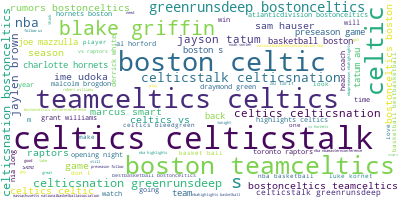

In [113]:
# Join the different processed titles together.
long_string = ','.join(list(document_train.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Figure 11

In [114]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tf_documents, tf_vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      32.420952   8.115230       1        1  24.113365
4       0.648955  71.707100       2        1  12.256440
3      71.019684   9.971006       3        1  11.969340
2       3.785981  33.185135       4        1  10.857867
7     -42.666500  -9.222070       5        1   9.368441
0      -3.621689 -43.526516       6        1   7.809940
1      -3.632402  -4.171708       7        1   7.388476
5     -36.584400  35.804413       8        1   6.954910
8      44.391380  50.615383       9        1   4.719937
9      40.235809 -31.591665      10        1   4.561285, topic_info=               Term        Freq        Total Category  logprob  loglift
4426          tatum  513.000000   513.000000  Default  30.0000  30.0000
2465         jayson  332.000000   332.000000  Default  29.0000  29.0000
2223     highlights  297.000000   297.000000  Default  28.0000  28.0000
4153          smart  253.000000   253.000000  Default  27.0000  27.0000
972   celticsnation  775.000000   775.000000  Default  26.0000  26.0000
...             ...         ...          ...      ...      ...      ...
728   bostonceltics   36.843620  1873.172383  Topic10  -4.5888  -0.8411
4872            win   17.026580   166.967683  Topic10  -5.3607   0.8045
2463    jaylenbrown   15.960929   149.072363  Topic10  -5.4253   0.8533
3988         season   16.858247   401.220806  Topic10  -5.3706  -0.0821
2848        malcolm   15.374480   116.114526  Topic10  -5.4628   1.0657

[667 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         8  0.905086       04
4         5  0.983312       05
5         5  0.989766       07
9         1  0.124139       10
9         2  0.015201       10
...     ...       ...      ...
4946      7  0.316497     year
4946      8  0.510711     year
4960      2  0.932337  youtube
4960      5  0.054843  youtube
4972      6  0.927722     zone

[1217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 4, 3, 8, 1, 2, 6, 9, 10])

# Another type of text analysis we can conduct to analyse a topic's term weights is Non-negative Matrix Factorization (NMF).  We will use NMF on the Golden State Warriors Twitter tweet data and compare its analysis with our results for LDA.

In [115]:
n_topics = 10
X = tfidf_documents
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

nmf = decomposition.NMF(n_components=n_topics, random_state=0, init='nndsvd')
W = nmf.fit_transform(X)
H = nmf.components_

top = 8 
topic_index_max = n_topics

for topic_index in range(0, topic_index_max):
    top_indices = np.argsort(H[topic_index, :])[::-1]
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(tfidf_feature_names[term_index])
        #top_terms1 = [doc for doc in top_terms if len(doc)>1]
    print("topic ", topic_index, top_terms)

topic  0 ['boston teamceltics', 'teamceltics', 'teamceltics celtics', 'boston', 'celticstalk', 'celtics celticstalk', 'celtics', 'celtics boston']
topic  1 ['greenrunsdeep', 'celticsnation', 'greenrunsdeep bostonceltics', 'celticsnation greenrunsdeep', 'celtics celticsnation', 'bostonceltics', '22 celtics', '10 22']
topic  2 ['celtics', 'game', 'love', 'season', 'let', 'bleedgreen', 'preseason', 'celtics bleedgreen']
topic  3 ['blake', 'griffin', 'blake griffin', 'debut', 'griffin celtics', 'celtics', 'solid', 'blakegriffin']
topic  4 ['hauser', 'sam', 'sam hauser', 'role', 'hauser celtics', 'role celtics', 'going', 'making']
topic  5 ['tatum', 'jayson', 'jayson tatum', 'tatum au', 'au', 'au tarif', 'tarif', 'vert']
topic  6 ['nba', 'boston celtics', 'boston', 'basketball', 'bostonceltics', 'raptors', 'vs', 'highlights']
topic  7 ['udoka', 'ime', 'ime udoka', 'coach', 'imeudoka', 'nia', 'long', 'nia long']
topic  8 ['jaylen', 'brown', 'jaylen brown', 'jaylenbrown', 'tatum jaylen', 'jus

# We can now display the weights from topic 1 while utilizing NMF

# Figure 13

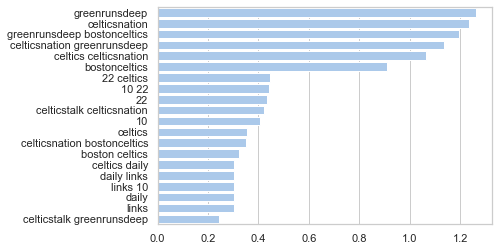

In [116]:
sns.set(style="whitegrid")

topic_index = 1
vocab = np.array(tfidf_feature_names)
top_term_indices = np.array(np.argsort(H[topic_index, :])[::-1])[0:20]

term_strings = vocab[top_term_indices]
term_weights = H[topic_index, top_term_indices]

sns.set_color_codes('pastel')
sns.barplot(x=term_weights, y=term_strings, label='Weight', color='b')

plt.show()

In [118]:
#pyLDAvis.enable_notebook()
#panel1 = pyLDAvis.sklearn.prepare(nmf, tfidf_documents, tfidf_vectorizer, mds='tsne')
#panel1